In [1]:
import numpy as np
import pandas as pd
import re

from keras.models import Sequential
from keras.layers import Dense, Input, Dropout, Bidirectional,LSTM, Activation
from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt


In [2]:
train = pd.read_csv(r"https://raw.githubusercontent.com/RussellDash332/CS3244-Twemoji/main/Datasets/train_text_emoji_clean.csv")
test = pd.read_csv(r"https://raw.githubusercontent.com/RussellDash332/CS3244-Twemoji/main/Datasets/test_text_emoji_clean.csv")
valid = pd.read_csv(r"https://raw.githubusercontent.com/RussellDash332/CS3244-Twemoji/main/Datasets/valid_text_emoji_clean.csv")

In [3]:
import spacy
!pip install --disable-pip-version-check -q pyspellchecker

nlp = spacy.load('en', disable=['parser', 'ner'])


def preprocess_text(sen):
    sentence = sen.lower()

    sentence = nlp(sentence)
    sentence = " ".join([token.lemma_ for token in sentence])

    sentence = re.sub("-PRON-", "", sentence)
    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sen)
    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    sentence = sentence.lower()

    return sentence.strip()

#train["tweets"] = train["tweets"].apply(preprocess_text)
#test["tweets"] = test["tweets"].apply(preprocess_text)
#valid['tweets'] = valid['tweets'].apply(preprocess_text)

X_train = train['tweets']
Y_train = train['labels']

X_test = test['tweets']
Y_test = test['labels']

X_valid = valid['tweets']
Y_valid = valid['labels']

Y_test = np_utils.to_categorical(Y_test)
Y_train = np_utils.to_categorical(Y_train)
Y_valid = np_utils.to_categorical(Y_valid)

     |████████████████████████████████| 2.7 MB 5.3 MB/s 


In [5]:
# Splitting the train data from sentences to words
for i in range(X_train.shape[0]):
    X_train[i] = X_train[i].split()

# Splitting the test data from sentences to words
for i in range(X_test.shape[0]):
    X_test[i] = X_test[i].split()

# Splitting the validation data from sentences to words
for i in range(X_valid.shape[0]):
    X_valid[i] = X_valid[i].split()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added b

In [6]:
print(Y_train)

0         0
1         0
2         0
3         0
4         0
         ..
52879    11
52880    11
52881    11
52882    11
52883    11
Name: labels, Length: 52884, dtype: int64


In [7]:
print(X_train)

0                       [school, is, so, dead, o, my, god]
1        [lol, ive, been, told, mine, is, worse, than, ...
2        [im, excited, to, hear, them, that, shit, is, ...
3        [damn, alicia, knows, everything, even, indire...
4                          [that, sound, like, everything]
                               ...                        
52879        [or, that, picture, was, just, cute, to, you]
52880           [im, tow, wit, some, gas, still, hate, me]
52881                               [yeah, you, kinda, do]
52882                     [nothing, wit, youuuu, raymundo]
52883    [dont, be, that, person, who, parks, right, ne...
Name: tweets, Length: 52884, dtype: object


In [8]:
# To check maximum length of sentence in training data
np.unique(np.array([len(ix) for ix in X_train]) , return_counts=True)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 array([2078, 4523, 4665, 4501, 4480, 4165, 3639, 3128, 2833, 2608, 2280,
        2081, 1723, 1643, 1302, 1183, 1019,  875,  797,  693,  626,  481,
         403,  353,  299,  165,  146,   92,   60,   24,   12,    5,    2]))

In [11]:
# To check maximum length of sentence in testing data
#np.unique(np.array([len(ix) for ix in X_valid]) , return_counts=True)

np.unique(np.array([len(ix) for ix in X_test]) , return_counts=True)


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 array([ 558, 1075, 1126, 1181, 1180, 1072,  913,  822,  746,  669,  597,
         496,  456,  418,  343,  278,  262,  208,  208,  187,  155,  131,
         120,   90,   62,   43,   31,   19,   23,   11,    3,    2]))

In [13]:
!wget http://nlp.stanford.edu/data/glove.twitter.27B.zip
!unzip glove*.zip

--2021-11-16 16:09:32--  http://nlp.stanford.edu/data/glove.twitter.27B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.twitter.27B.zip [following]
--2021-11-16 16:09:32--  https://nlp.stanford.edu/data/glove.twitter.27B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.twitter.27B.zip [following]
--2021-11-16 16:09:32--  http://downloads.cs.stanford.edu/nlp/data/glove.twitter.27B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1520408563 (1.4G) [appli

In [14]:
# Creating  embeddings dictionary with key = word and value = list of words in glove vector
embeddings_index = {}

f = open('glove.twitter.27B.100d.txt', encoding = "utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

In [15]:
# Checking length of a particular word
embeddings_index["i"].shape

embeddings_index["c"].shape

(100,)

In [16]:
# Filling the embedding matrix
x = embeddings_index["."]
x[x != 0] = 0

embedding_matrix_train = np.zeros((X_train.shape[0], 33, 100))
embedding_matrix_test = np.zeros((X_test.shape[0], 33, 100))
embedding_matrix_valid = np.zeros((X_valid.shape[0], 33, 100))

count = 0

for i in range(X_train.shape[0]):
    for j in range(len(X_train[i])):
        if (X_train[i][j].lower() in embeddings_index.keys()):
            embedding_matrix_train[i][j] = embeddings_index[X_train[i][j].lower()]
        else:
            embedding_matrix_train[i][j] = np.zeros(100)
        
for i in range(X_test.shape[0]):
    for j in range(len(X_test[i])):
        if (X_test[i][j].lower() in embeddings_index.keys()):
            embedding_matrix_test[i][j] = embeddings_index[X_test[i][j].lower()]
        else: 
            embedding_matrix_test[i][j] = np.zeros(100)

for i in range(X_valid.shape[0]):
    for j in range(len(X_valid[i])):
        if (X_valid[i][j].lower() in embeddings_index.keys()):
            embedding_matrix_valid[i][j] = embeddings_index[X_valid[i][j].lower()]
        else: 
            embedding_matrix_valid[i][j] = np.zeros(100)

In [24]:
#LSTM model
model = Sequential()
model.add(LSTM(128, input_shape=(33,100), return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(128, input_shape=(33,100)))
model.add(Dropout(0.5))
model.add(Dense(12))
model.add(Activation('softmax'))

# Setting Loss ,Optimiser for model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
print(model.summary())

In [25]:
from keras import callbacks

early_stopping_1 = callbacks.EarlyStopping(monitor = "val_accuracy", mode = "max", patience = 20, restore_best_weights = True, verbose = 1)

hist = model.fit(embedding_matrix_train,Y_train, validation_data=(embedding_matrix_valid, Y_valid), epochs = 10, batch_size=32, shuffle=True, callbacks = [early_stopping_1])

Epoch 1/10
1653/1653 [==============================] - 47s 26ms/step - loss: 2.2948 - accuracy: 0.1715 - val_loss: 2.2268 - val_accuracy: 0.1883
Epoch 2/10
1653/1653 [==============================] - 40s 24ms/step - loss: 2.1862 - accuracy: 0.2251 - val_loss: 2.2078 - val_accuracy: 0.1886
Epoch 3/10
1653/1653 [==============================] - 41s 25ms/step - loss: 2.1376 - accuracy: 0.2494 - val_loss: 2.1454 - val_accuracy: 0.2371
Epoch 4/10
1653/1653 [==============================] - 40s 24ms/step - loss: 2.0939 - accuracy: 0.2710 - val_loss: 2.1495 - val_accuracy: 0.2542
Epoch 5/10
1653/1653 [==============================] - 40s 24ms/step - loss: 2.0588 - accuracy: 0.2865 - val_loss: 2.1166 - val_accuracy: 0.2590
Epoch 6/10
1653/1653 [==============================] - 40s 24ms/step - loss: 2.0221 - accuracy: 0.3021 - val_loss: 2.1036 - val_accuracy: 0.2676
Epoch 7/10
1653/1653 [==============================] - 40s 24ms/step - loss: 1.9870 - accuracy: 0.3167 - val_loss: 2.1199 -

In [26]:
# Getting accuracy and loss

score1 = model.evaluate(embedding_matrix_test, Y_test)

print("Test Score:", score1[0])
print("Test Accuracy:", score1[1])
print(score1)
print(model.metrics_names)

422/422 [==============================] - 4s 10ms/step - loss: 2.1646 - accuracy: 0.2615
Test Score: 2.164597272872925
Test Accuracy: 0.26147571206092834
[2.164597272872925, 0.26147571206092834]
['loss', 'accuracy']


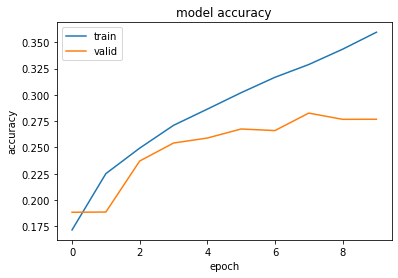

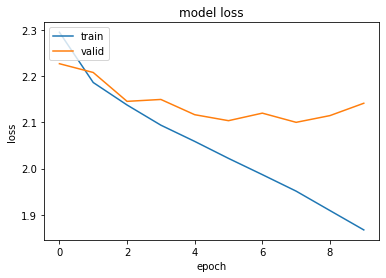

In [27]:
#Plotting epoch graph
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','valid'], loc='upper left')
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','valid'], loc='upper left')
plt.show()

In [46]:
# Save the entire model as a SavedModel.
!mkdir -p saved_model
model.save('saved_model/my_model') 

INFO:tensorflow:Assets written to: saved_model/my_model/assets


INFO:tensorflow:Assets written to: saved_model/my_model/assets


In [29]:
# Prediction of the trained model 
pred = model.predict(embedding_matrix_test)

In [33]:
# Get all predicted labels into 1 array
prediction = []

for i in range(len(pred)):
  prediction.append(np.argmax(pred[i]))

print(prediction)

[0, 0, 6, 3, 7, 10, 0, 7, 5, 0, 1, 9, 7, 3, 9, 6, 11, 7, 5, 8, 0, 2, 11, 10, 10, 0, 0, 0, 0, 6, 0, 5, 0, 10, 0, 7, 6, 8, 0, 0, 2, 3, 10, 0, 0, 10, 11, 7, 9, 6, 9, 2, 11, 7, 5, 11, 0, 7, 7, 0, 11, 5, 7, 5, 9, 10, 0, 0, 9, 5, 9, 1, 11, 5, 0, 0, 0, 11, 0, 9, 0, 0, 7, 7, 0, 10, 0, 10, 11, 10, 7, 6, 7, 9, 0, 0, 8, 2, 0, 10, 5, 0, 0, 0, 0, 6, 1, 5, 0, 2, 7, 11, 10, 8, 7, 0, 0, 7, 10, 10, 0, 1, 7, 0, 0, 0, 0, 0, 11, 9, 5, 6, 0, 11, 5, 0, 7, 0, 9, 0, 11, 0, 0, 0, 5, 6, 0, 0, 7, 10, 0, 0, 0, 10, 2, 0, 10, 0, 10, 0, 7, 10, 6, 10, 11, 5, 2, 1, 8, 7, 9, 11, 0, 1, 0, 11, 3, 10, 0, 0, 0, 3, 11, 0, 0, 8, 10, 8, 0, 0, 0, 7, 2, 11, 2, 0, 5, 2, 2, 10, 11, 7, 5, 11, 2, 6, 0, 0, 9, 0, 6, 5, 5, 0, 2, 7, 10, 9, 9, 11, 9, 7, 6, 8, 0, 11, 8, 5, 0, 7, 0, 2, 9, 0, 7, 10, 11, 5, 0, 9, 0, 11, 6, 5, 0, 4, 0, 0, 11, 0, 0, 11, 0, 0, 9, 11, 2, 10, 2, 0, 7, 0, 7, 11, 0, 8, 0, 0, 0, 6, 0, 10, 6, 9, 5, 0, 0, 1, 0, 10, 1, 3, 9, 1, 6, 9, 0, 8, 5, 1, 9, 11, 9, 3, 0, 7, 9, 0, 10, 5, 7, 0, 0, 3, 0, 11, 11, 0, 9, 1, 5, 0, 0, 

In [35]:
#prediction against test

Y_test = test['labels']
test_labels = Y_test.values.tolist()
report = pd.DataFrame({'Actual': test_labels, 'Predicted': prediction})

report

,Actual,Predicted
0,0,0
1,0,0
2,0,6
3,0,3
4,0,7
...,...,...
13480,11,3
13481,11,9
13482,11,0
13483,11,3


In [36]:
# Accumulate the number of each [actual, prediction] pair

numbers = report.groupby(['Actual', 'Predicted']).size()

pair_values = pd.DataFrame(numbers)

In [37]:
pair_values

0
Actual Predicted     
0      0          568
       1           68
       2           82
       3           61
       4           11
...               ...
11     7           98
       8           12
       9           58
       10          48
       11         312

[144 rows x 1 columns]

In [38]:
# Create confusion matrix
import seaborn
data=[]

used_pair_values = pair_values[0]

for i in range(12):
  row = []
  for j in range(12):
    row.append(used_pair_values[i][j])
  data.append(row)

emojis = train["annotations"].unique()
final = pd.DataFrame(data, index=emojis, columns=emojis)

final.index.name="Actual"

final.columns.name="Predicted"




In [39]:
final

Predicted,😂,😭,😍,🙄,❤,😊,😩,🤔,😘,🏽,💯,🙃
Actual,,,,,,,,,,,,
😂,568,68,82,61,11,121,92,215,41,134,175,236
😭,324,171,100,71,27,45,216,129,44,89,94,260
😍,137,26,411,8,50,70,72,62,69,114,16,58
🙄,217,36,23,102,4,38,127,133,13,75,143,304
❤,48,23,103,4,155,93,9,26,152,63,25,30
😊,92,10,57,5,37,174,24,41,95,72,55,81
😩,159,94,79,50,12,40,277,118,18,69,89,303
🤔,191,21,24,28,6,36,69,475,10,84,116,156
😘,46,2,46,4,34,91,7,9,203,37,19,14


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128580 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 129300 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127997 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128175 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128579 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128580 missing from current font.
  fon

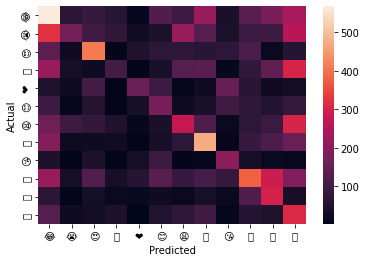

In [40]:
#Raw confusion matrix

sns.heatmap(final)

In [41]:
# Micro-average evaluation is used as the dataset is imbalanced

True_Positive = [0]*12
True_Negative = [0]*12
False_Positive = [0]*12
False_Negative = [0]*12

for i in range(12):
  True_Positive[i] = used_pair_values[i][i]
  for j in range(12):
    for k in range(12):
      if i == k and j != k:
        False_Negative[k] += used_pair_values[i][j]
      elif i != k and j == k:
        False_Positive[k] += used_pair_values[i][j]
      else:
        True_Negative[k] += used_pair_values[i][j]

TP = sum(True_Positive)/12
TN = sum(True_Negative)/12
FP = sum(False_Positive)/12
FN = sum(False_Negative)/12

In [42]:
print("True Positive: "+str(TP))
print("True Negative: "+str(TN))
print("False Positive: "+str(FP))
print("False Negative: "+str(FN))

True Positive: 293.8333333333333
True Negative: 11825.166666666666
False Positive: 829.9166666666666
False Negative: 829.9166666666666


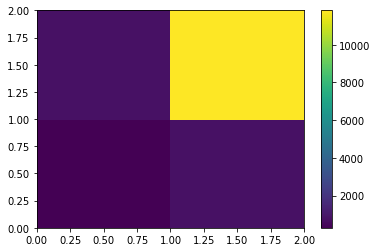

In [43]:
#Confusion matrix

cleaned_confusion_matrix = [[TP, FP],[FN, TN]]
heatmap = plt.pcolor(cleaned_confusion_matrix)
plt.colorbar(heatmap)
plt.show()

In [44]:
# Calculate precsion and recall and F1

Precision = TP/(TP+FP)
Recall = TP/(TP+FN)
F1 = 2/((1/Precision)+(1/Recall))

In [45]:
print("Precision: "+str(Precision))
print("Recall: "+str(Recall))
print("F1 score: "+str(F1))

Precision: 0.2614757137560252
Recall: 0.2614757137560252
F1 score: 0.2614757137560252
